<a href="https://colab.research.google.com/github/sarmad-mahar/Lakes-of-Sindh/blob/main/creating_study_area_maps_fast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

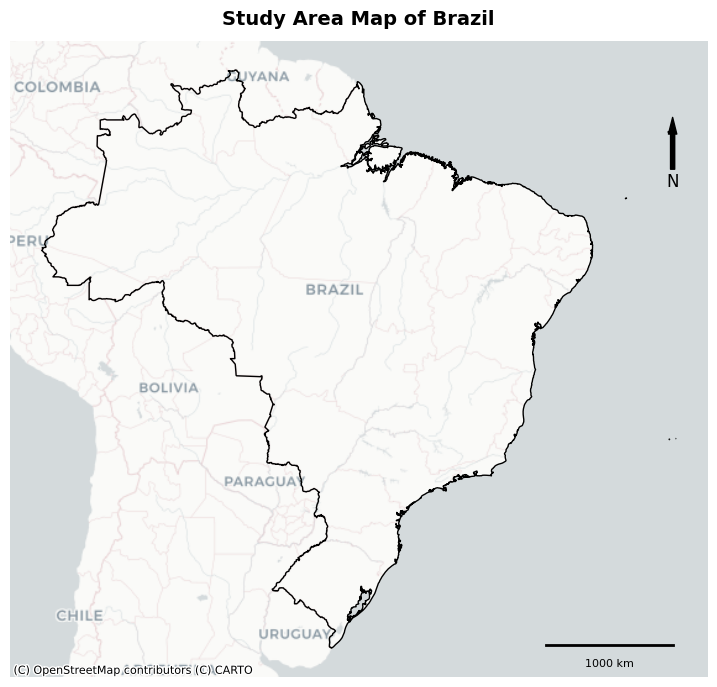

In [9]:
# =========================================================
# Study Area Map of Brazil – Google Colab
# =========================================================

# 1. Install required libraries
!pip install geopandas contextily matplotlib pyproj shapely --quiet

# 2. Import libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# 3. Fetch country boundaries (Natural Earth – external source)
url = "https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip"
world = gpd.read_file(url)

# 4. Extract Brazil boundary
brazil = world[world["NAME"] == "Brazil"]

# 5. Reproject to Web Mercator for basemap compatibility
brazil = brazil.to_crs(epsg=3857)

# 6. Create figure and axis
fig, ax = plt.subplots(figsize=(9, 9))

# 7. Plot Brazil boundary
brazil.plot(
    ax=ax,
    facecolor="none",
    edgecolor="black",
    linewidth=1,
    zorder=2
)

# 8. Add basemap
ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron,
    zoom=4
)

# 9. Add title
ax.set_title(
    "Study Area Map of Brazil",
    fontsize=14,
    weight="bold",
    pad=12
)

# 10. Remove axes
ax.axis("off")

# 11. Add north arrow
ax.annotate(
    "N",
    xy=(0.95, 0.88),
    xytext=(0.95, 0.78),
    arrowprops=dict(facecolor="black", width=3, headwidth=6),
    ha="center",
    va="center",
    fontsize=12,
    xycoords=ax.transAxes
)

# 12. Add scale bar (simple line scale)
# Length of scale bar in meters (e.g., 1000 km)
scale_length = 1_000_000  # 1000 km

# Get axis limits
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# Position of scale bar (bottom-right)
x_start = x_max - scale_length - (x_max - x_min) * 0.05
x_end   = x_start + scale_length
y_pos   = y_min + (y_max - y_min) * 0.05

# Draw scale line
ax.plot(
    [x_start, x_end],
    [y_pos, y_pos],
    color="black",
    linewidth=2
)

# Draw scale text
ax.text(
    (x_start + x_end) / 2,
    y_pos - (y_max - y_min) * 0.02,
    "1000 km",
    ha="center",
    va="top",
    fontsize=8
)


# 13. Save output as high-resolution PNG
plt.savefig(
    "Brazil_Study_Area_Map.png",
    dpi=300,
    bbox_inches="tight"
)

# 14. Display map
plt.show()
